<a href="https://colab.research.google.com/github/luigiselmi/timeseries/blob/main/traffic_forecast_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metro Interstate Traffic Volume Forecasting (Part 1)
This notebook is based on chapter 12 of the book [*Time Series Forecasting in Python*](https://www.manning.com/books/time-series-forecasting-in-python-book) by Marco Peixeiro. We use a dataset for traffic forecasting. The dataset is available from the [UCI machine learning repository](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume). It contains hourly Interstate 94 Westbound traffic volume, from October 2nd 2012 to September 30 2018, for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume. The dataset does not contain missing values. We use a Python package to fetch the data from the UCI repository.

## The dataset
The dataset contains several variables that are used as features such as the meteorological variables and the type of day, holiday or not, and the traffic volume that is used as the target variable.

In [2]:
!pip3 install -U ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
#import tensorflow as tf
print("NumPy version: %s"%np.__version__)
print('Pandas version: %s'%pd.__version__)
print("matplotlib version: %s"%mpl.__version__)

NumPy version: 1.26.4
Pandas version: 2.2.2
matplotlib version: 3.10.0


In [4]:
# fetch dataset
metro_interstate_traffic_volume = fetch_ucirepo(id=492)

In [ ]:
# metadata
#print(metro_interstate_traffic_volume.metadata)

In [ ]:
print(metro_interstate_traffic_volume.variables)

                  name     role         type demographic  \
0              holiday  Feature  Categorical        None   
1                 temp  Feature   Continuous        None   
2              rain_1h  Feature   Continuous        None   
3              snow_1h  Feature   Continuous        None   
4           clouds_all  Feature      Integer        None   
5         weather_main  Feature  Categorical        None   
6  weather_description  Feature  Categorical        None   
7            date_time  Feature         Date        None   
8       traffic_volume   Target      Integer        None   

                                         description   units missing_values  
0  US National holidays plus regional holiday, Mi...    None             no  
1                             Average temp in kelvin  Kelvin             no  
2     Amount in mm of rain that occurred in the hour      mm             no  
3     Amount in mm of snow that occurred in the hour      mm             no  
4        

In [ ]:
# data (as pandas dataframes)
X = metro_interstate_traffic_volume.data.features
y = metro_interstate_traffic_volume.data.targets

In [ ]:
metro_interstate_traffic_volume.keys()

dict_keys(['data', 'metadata', 'variables'])

The variables are divided into features and target

In [ ]:
metro_interstate_traffic_volume.variables

,name,role,type,demographic,description,units,missing_values
0,holiday,Feature,Categorical,None,"US National holidays plus regional holiday, Mi...",None,no
1,temp,Feature,Continuous,None,Average temp in kelvin,Kelvin,no
2,rain_1h,Feature,Continuous,None,Amount in mm of rain that occurred in the hour,mm,no
3,snow_1h,Feature,Continuous,None,Amount in mm of snow that occurred in the hour,mm,no
4,clouds_all,Feature,Integer,None,Percentage of cloud cover,%,no
5,weather_main,Feature,Categorical,None,Short textual description of the current weather,None,no
6,weather_description,Feature,Categorical,None,Longer textual description of the current weather,None,no
7,date_time,Feature,Date,None,Hour of the data collected in local CST time,None,no
8,traffic_volume,Target,Integer,None,Hourly I-94 ATR 301 reported westbound traffic...,None,no


In [ ]:
metro_interstate_traffic_volume.data.features.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00


In [ ]:
metro_interstate_traffic_volume.data.features.tail(1)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00


In [ ]:
metro_interstate_traffic_volume.data.features.count()

holiday                   61
temp                   48204
rain_1h                48204
snow_1h                48204
clouds_all             48204
weather_main           48204
weather_description    48204
date_time              48204
dtype: int64

In [ ]:
metro_interstate_traffic_volume.data.features.shape

(48204, 8)

In [ ]:
metro_interstate_traffic_volume.data.targets

,traffic_volume
0,5545
1,4516
2,4767
3,5026
4,4918
...,...
48199,3543
48200,2781
48201,2159
48202,1450


### Traffic volume

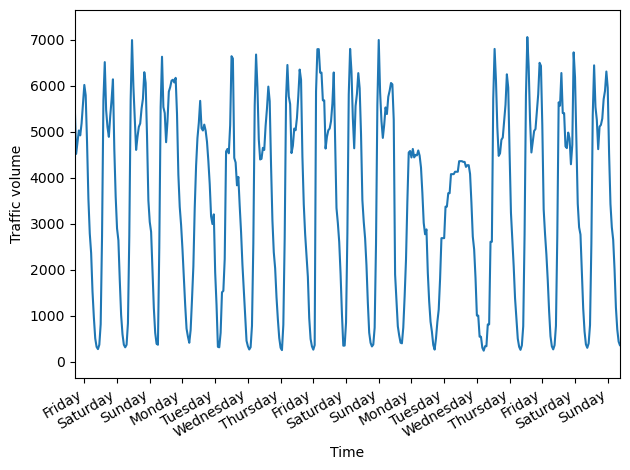

In [ ]:
fig, ax = plt.subplots()

ax.plot(y['traffic_volume'])
ax.set_xlabel('Time')
ax.set_ylabel('Traffic volume')

plt.xticks(np.arange(start=7, stop=400, step=24), ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlim(0, 400)

fig.autofmt_xdate()
plt.tight_layout()

### Temperature yearly seasonality

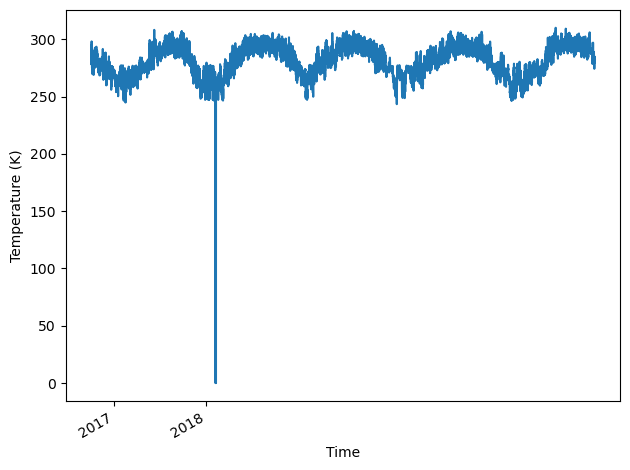

In [ ]:
fig, ax = plt.subplots()

ax.plot(X['temp'])
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (K)')

plt.xticks([2239, 10999], [2017, 2018])

fig.autofmt_xdate()
plt.tight_layout()

### Temperature daily seasonality

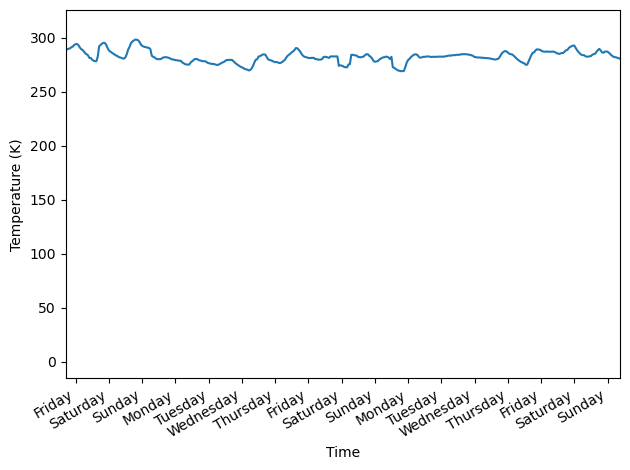

In [ ]:
fig, ax = plt.subplots()

ax.plot(X['temp'])
ax.set_xlabel('Time')
ax.set_ylabel('Temperature (K)')

plt.xticks(np.arange(start=7, stop=400, step=24), ['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlim(0, 400)

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,48204.0,281.205870,13.338232,0.0,272.16,282.45,291.806,310.07
rain_1h,48204.0,0.334264,44.789133,0.0,0.00,0.00,0.000,9831.30
snow_1h,48204.0,0.000222,0.008168,0.0,0.00,0.00,0.000,0.51
clouds_all,48204.0,49.362231,39.015750,0.0,1.00,64.00,90.000,100.00


In [ ]:
cols_to_drop = ['rain_1h', 'snow_1h']
X_drop = X.drop(cols_to_drop, axis=1)
X_drop.shape

(48204, 8)

In [ ]:
timestamp_s = pd.to_datetime(X['date_time']).map(datetime.datetime.timestamp)

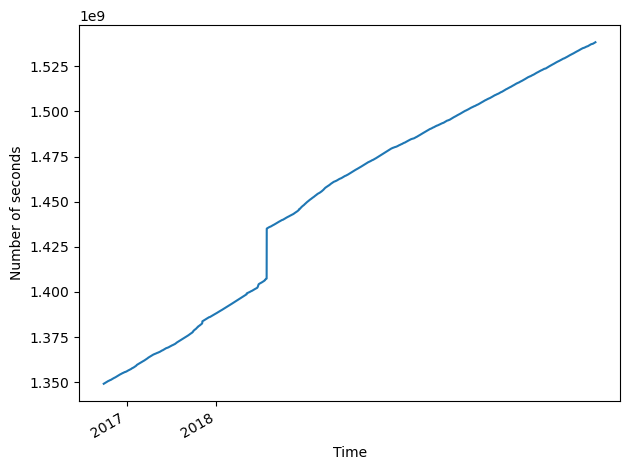

In [ ]:
fig, ax = plt.subplots()

ax.plot(timestamp_s)
ax.set_xlabel('Time')
ax.set_ylabel('Number of seconds')

plt.xticks([2239, 10999], [2017, 2018])

fig.autofmt_xdate()
plt.tight_layout()

### Time cycles

In [ ]:
day = 24 * 60 * 60

In [ ]:
X_drop['day_sin'] = (np.sin(timestamp_s * (2*np.pi/day))).values
X_drop['day_cos'] = (np.cos(timestamp_s * (2*np.pi/day))).values

In [ ]:
X_drop = X_drop.drop(['date_time'], axis=1)
X_drop.head()

,holiday,temp,clouds_all,weather_main,weather_description,day_sin,day_cos
0,NaN,288.28,40,Clouds,scattered clouds,0.965926,-0.258819
1,NaN,289.36,75,Clouds,broken clouds,0.866025,-0.500000
2,NaN,289.58,90,Clouds,overcast clouds,0.707107,-0.707107
3,NaN,290.13,90,Clouds,overcast clouds,0.500000,-0.866025
4,NaN,291.14,75,Clouds,broken clouds,0.258819,-0.965926


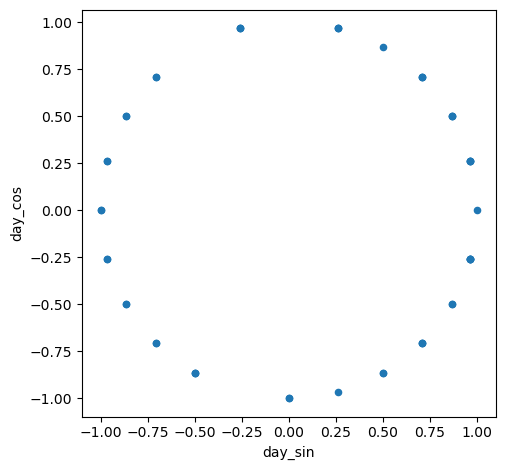

In [ ]:
X_drop.sample(50).plot.scatter('day_sin','day_cos').set_aspect('equal');
plt.tight_layout()

### Training, validation, and test sets
We split the data into 70-20-10 for training, validation, and test respectively

In [ ]:
X_drop = X_drop.drop(['weather_description', 'weather_main', 'holiday'], axis=1)

In [ ]:
n = len(X_drop)
train_df = X_drop[0:int(n * 0.7)]
val_df = X_drop[int(n * 0.7):int(n * 0.9)]
test_df = X_drop[int(n * 0.9):]
train_df.shape, val_df.shape, test_df.shape

((33742, 4), (9641, 4), (4821, 4))

We use the [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) from scikit-learn to scale the values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_df)

train_df[train_df.columns] = scaler.transform(train_df[train_df.columns])
val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])
test_df[test_df.columns] = scaler.transform(test_df[test_df.columns])

C:\Users\Luigi\AppData\Local\Temp\ipykernel_20376\2663594738.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[train_df.columns] = scaler.transform(train_df[train_df.columns])
C:\Users\Luigi\AppData\Local\Temp\ipykernel_20376\2663594738.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])
C:\Users\Luigi\AppData\Local\Temp\ipykernel_20376\2663594738.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [ ]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,33742.0,0.908603,0.043526,0.0,0.881521,0.90887,0.942837,1.0
clouds_all,33742.0,0.504494,0.388716,0.0,0.010000,0.64000,0.900000,1.0
day_sin,33742.0,0.504654,0.353897,0.0,0.146447,0.50000,0.853553,1.0
day_cos,33742.0,0.506369,0.353132,0.0,0.146447,0.50000,0.853553,1.0


In [ ]:
train_df.to_csv('data/metro_interstate_traffic/train.csv')
val_df.to_csv('data/metro_interstate_traffic/val.csv')
test_df.to_csv('data/metro_interstate_traffic/test.csv')